# Web Scraping

In [1]:
!pip install requests --upgrade --quiet

In [2]:
#Load required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re


In [3]:
# Define the Flipkart search URL for phones
text_url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [4]:
# Send an HTTP GET request to the specified URL
response = requests.get(text_url)

In [5]:
# Check the HTTP status code of the response
response.status_code

200

In [6]:
# Get the content (HTML) of the response and store it in the variable 's'
s = response.text

In [7]:
# Calculate the length of the content
len(s)

142081

In [8]:
s[:10000]

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" siz

In [9]:
# Save the entire HTML content to a file named 'webpage.html'
with open('webpage.html','w',encoding='utf-8') as f:
    f.write(s)

In [10]:
# Parse the HTML content using BeautifulSoup
doc = BeautifulSoup(s, 'html.parser')

In [11]:
doc

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72

In [12]:
# Find all tags with the specified class (presumably model names)
selection_class = "_4rR01T"

model_tags = doc.find_all('div', {'class': selection_class})
len(model_tags)

24

In [13]:
model_tags[0].text

'OPPO Reno11 5G (Rock Grey, 128 GB)'

In [14]:
model = []
for tag in  model_tags:
    model.append(tag.text)
    
print(model)

['OPPO Reno11 5G (Rock Grey, 128 GB)', 'SAMSUNG Galaxy F04 (Opal Green, 64 GB)', 'SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'Apple iPhone 14 (Midnight, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'SAMSUNG Galaxy F04 (Jade Purple, 64 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'Apple iPhone 15 (Blue, 128 GB)', 'Apple iPhone 14 (Starlight, 128 GB)', 'SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)', 'Apple iPhone 14 (Purple, 128 GB)', 'SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)', 'POCO C51 - Locked with Airtel Prepaid (Royal Blue, 64 GB)', 'SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)', 'SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)', 'POCO C51 (Power Black, 64 GB)', 'SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)']


In [15]:
span_tag = doc.find_all('span',{'class':'_2_R_DZ'})
len(span_tag)

24

In [16]:
span_tag[:10]

[<span class="_2_R_DZ"><span><span>249 Ratings </span><span class="_13vcmD">&amp;</span><span> 26 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>92,780 Ratings </span><span class="_13vcmD">&amp;</span><span> 5,249 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>1,97,696 Ratings </span><span class="_13vcmD">&amp;</span><span> 11,323 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>3,25,460 Ratings </span><span class="_13vcmD">&amp;</span><span> 18,201 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>3,25,460 Ratings </span><span class="_13vcmD">&amp;</span><span> 18,201 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>3,25,460 Ratings </span><span class="_13vcmD">&amp;</span><span> 18,201 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>60,733 Ratings </span><span class="_13vcmD">&amp;</span><span> 3,611 Reviews</span></span></span>,
 <span class="_2_R_DZ"><span><span>1,51,679 Ratings </sp

In [17]:
span_tag[0].text

'249 Ratings\xa0&\xa026 Reviews'

In [18]:
span_tag[0].text.split()

['249', 'Ratings', '&', '26', 'Reviews']

In [19]:
Ratings = []

for tag in span_tag:
    Ratings.append(tag.text.split()[0])
    
print(Ratings)

['249', '92,780', '1,97,696', '3,25,460', '3,25,460', '3,25,460', '60,733', '1,51,679', '1,51,679', '1,51,679', '2,69,549', '60,733', '92,780', '60,733', '9,510', '2,69,549', '84,499', '2,69,549', '84,499', '1,69,584', '34,314', '1,97,696', '1,69,584', '34,314']


In [20]:
Reviews = []

for tag in span_tag:
    Reviews.append(tag.text.split()[3])
    
print(Reviews)

['26', '5,249', '11,323', '18,201', '18,201', '18,201', '3,611', '8,100', '8,100', '8,100', '10,530', '3,611', '5,249', '3,611', '616', '10,530', '6,120', '10,530', '6,120', '9,445', '2,261', '11,323', '9,445', '2,261']


In [21]:
len(Reviews)

24

In [22]:
selection_class = "_30jeq3 _1_WHN1"

price_tags = doc.find_all('div', {'class': selection_class})
len(model_tags)

24

In [23]:
price_tags[:10]

[<div class="_30jeq3 _1_WHN1">₹29,999</div>,
 <div class="_30jeq3 _1_WHN1">₹5,999</div>,
 <div class="_30jeq3 _1_WHN1">₹7,499</div>,
 <div class="_30jeq3 _1_WHN1">₹12,999</div>,
 <div class="_30jeq3 _1_WHN1">₹12,999</div>,
 <div class="_30jeq3 _1_WHN1">₹12,999</div>,
 <div class="_30jeq3 _1_WHN1">₹14,999</div>,
 <div class="_30jeq3 _1_WHN1">₹11,999</div>,
 <div class="_30jeq3 _1_WHN1">₹11,999</div>,
 <div class="_30jeq3 _1_WHN1">₹11,999</div>]

In [24]:
price = []

for tag in price_tags:
    price.append(tag.text)
    
print(price)

['₹29,999', '₹5,999', '₹7,499', '₹12,999', '₹12,999', '₹12,999', '₹14,999', '₹11,999', '₹11,999', '₹11,999', '₹57,999', '₹14,999', '₹5,999', '₹14,999', '₹66,999', '₹57,999', '₹10,990', '₹57,999', '₹10,990', '₹5,399', '₹9,990', '₹7,499', '₹5,699', '₹9,990']


In [25]:
# Create a dictionary with extracted information and convert it to a DataFrame
mb_dict = {
    'Model':model,
    'Ratings':Ratings,
    'Reviews':Reviews,
    'Price':price
}

In [26]:
mb_df = pd.DataFrame(mb_dict)
mb_df

,Model,Ratings,Reviews,Price
0,"OPPO Reno11 5G (Rock Grey, 128 GB)",249,26,"₹29,999"
1,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","92,780","5,249","₹5,999"
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","1,97,696","11,323","₹7,499"
3,"vivo T2x 5G (Aurora Gold, 128 GB)","3,25,460","18,201","₹12,999"
4,"vivo T2x 5G (Marine Blue, 128 GB)","3,25,460","18,201","₹12,999"
5,"vivo T2x 5G (Glimmer Black, 128 GB)","3,25,460","18,201","₹12,999"
6,"vivo T2x 5G (Aurora Gold, 128 GB)","60,733","3,611","₹14,999"
7,"vivo T2x 5G (Marine Blue, 128 GB)","1,51,679","8,100","₹11,999"
8,"vivo T2x 5G (Aurora Gold, 128 GB)","1,51,679","8,100","₹11,999"
9,"vivo T2x 5G (Glimmer Black, 128 GB)","1,51,679","8,100","₹11,999"


In [27]:
mb_df.to_csv('Flipkart_phone')

---
---

# Data Analysis

In [28]:
#Loading required libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


## Data Preprocessing
- Dealing with Duplicates
- Dealing with missing values
- Dealing with Object value

In [29]:
mb_df.head()

,Model,Ratings,Reviews,Price
0,"OPPO Reno11 5G (Rock Grey, 128 GB)",249,26,"₹29,999"
1,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","92,780","5,249","₹5,999"
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","1,97,696","11,323","₹7,499"
3,"vivo T2x 5G (Aurora Gold, 128 GB)","3,25,460","18,201","₹12,999"
4,"vivo T2x 5G (Marine Blue, 128 GB)","3,25,460","18,201","₹12,999"


In [30]:
mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Model    24 non-null     object
 1   Ratings  24 non-null     object
 2   Reviews  24 non-null     object
 3   Price    24 non-null     object
dtypes: object(4)
memory usage: 900.0+ bytes


In [31]:
mb_df.nunique()

Model      17
Ratings    11
Reviews    11
Price      12
dtype: int64

In [32]:
def clean_convert(value):
    clean_value = value.replace('₹','').replace(',','')
    return int(clean_value)

In [33]:
mb_df.columns

Index(['Model', 'Ratings', 'Reviews', 'Price'], dtype='object')

In [34]:
mb_df[['Ratings', 'Reviews', 'Price']] = mb_df[['Ratings', 'Reviews', 'Price']].applymap(clean_convert)
mb_df.head()

,Model,Ratings,Reviews,Price
0,"OPPO Reno11 5G (Rock Grey, 128 GB)",249,26,29999
1,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",92780,5249,5999
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",197696,11323,7499
3,"vivo T2x 5G (Aurora Gold, 128 GB)",325460,18201,12999
4,"vivo T2x 5G (Marine Blue, 128 GB)",325460,18201,12999


In [35]:
mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Model    24 non-null     object
 1   Ratings  24 non-null     int64 
 2   Reviews  24 non-null     int64 
 3   Price    24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 900.0+ bytes


In [36]:
mb_df.shape

(24, 4)

In [37]:
mb_df.describe()

,Ratings,Reviews,Price
count,24.000000,24.000000,24.000000
mean,149573.666667,7948.500000,19626.666667
std,103948.067466,5198.603893,19265.318189
min,249.000000,26.000000,5399.000000
25%,60733.000000,3611.000000,9367.250000
50%,151679.000000,8100.000000,11999.000000
75%,215659.250000,10530.000000,14999.000000
max,325460.000000,18201.000000,66999.000000


In [38]:
mb_df.isnull().sum()

Model      0
Ratings    0
Reviews    0
Price      0
dtype: int64

In [39]:
mb_df.duplicated().sum()

0

## EDA Analysis

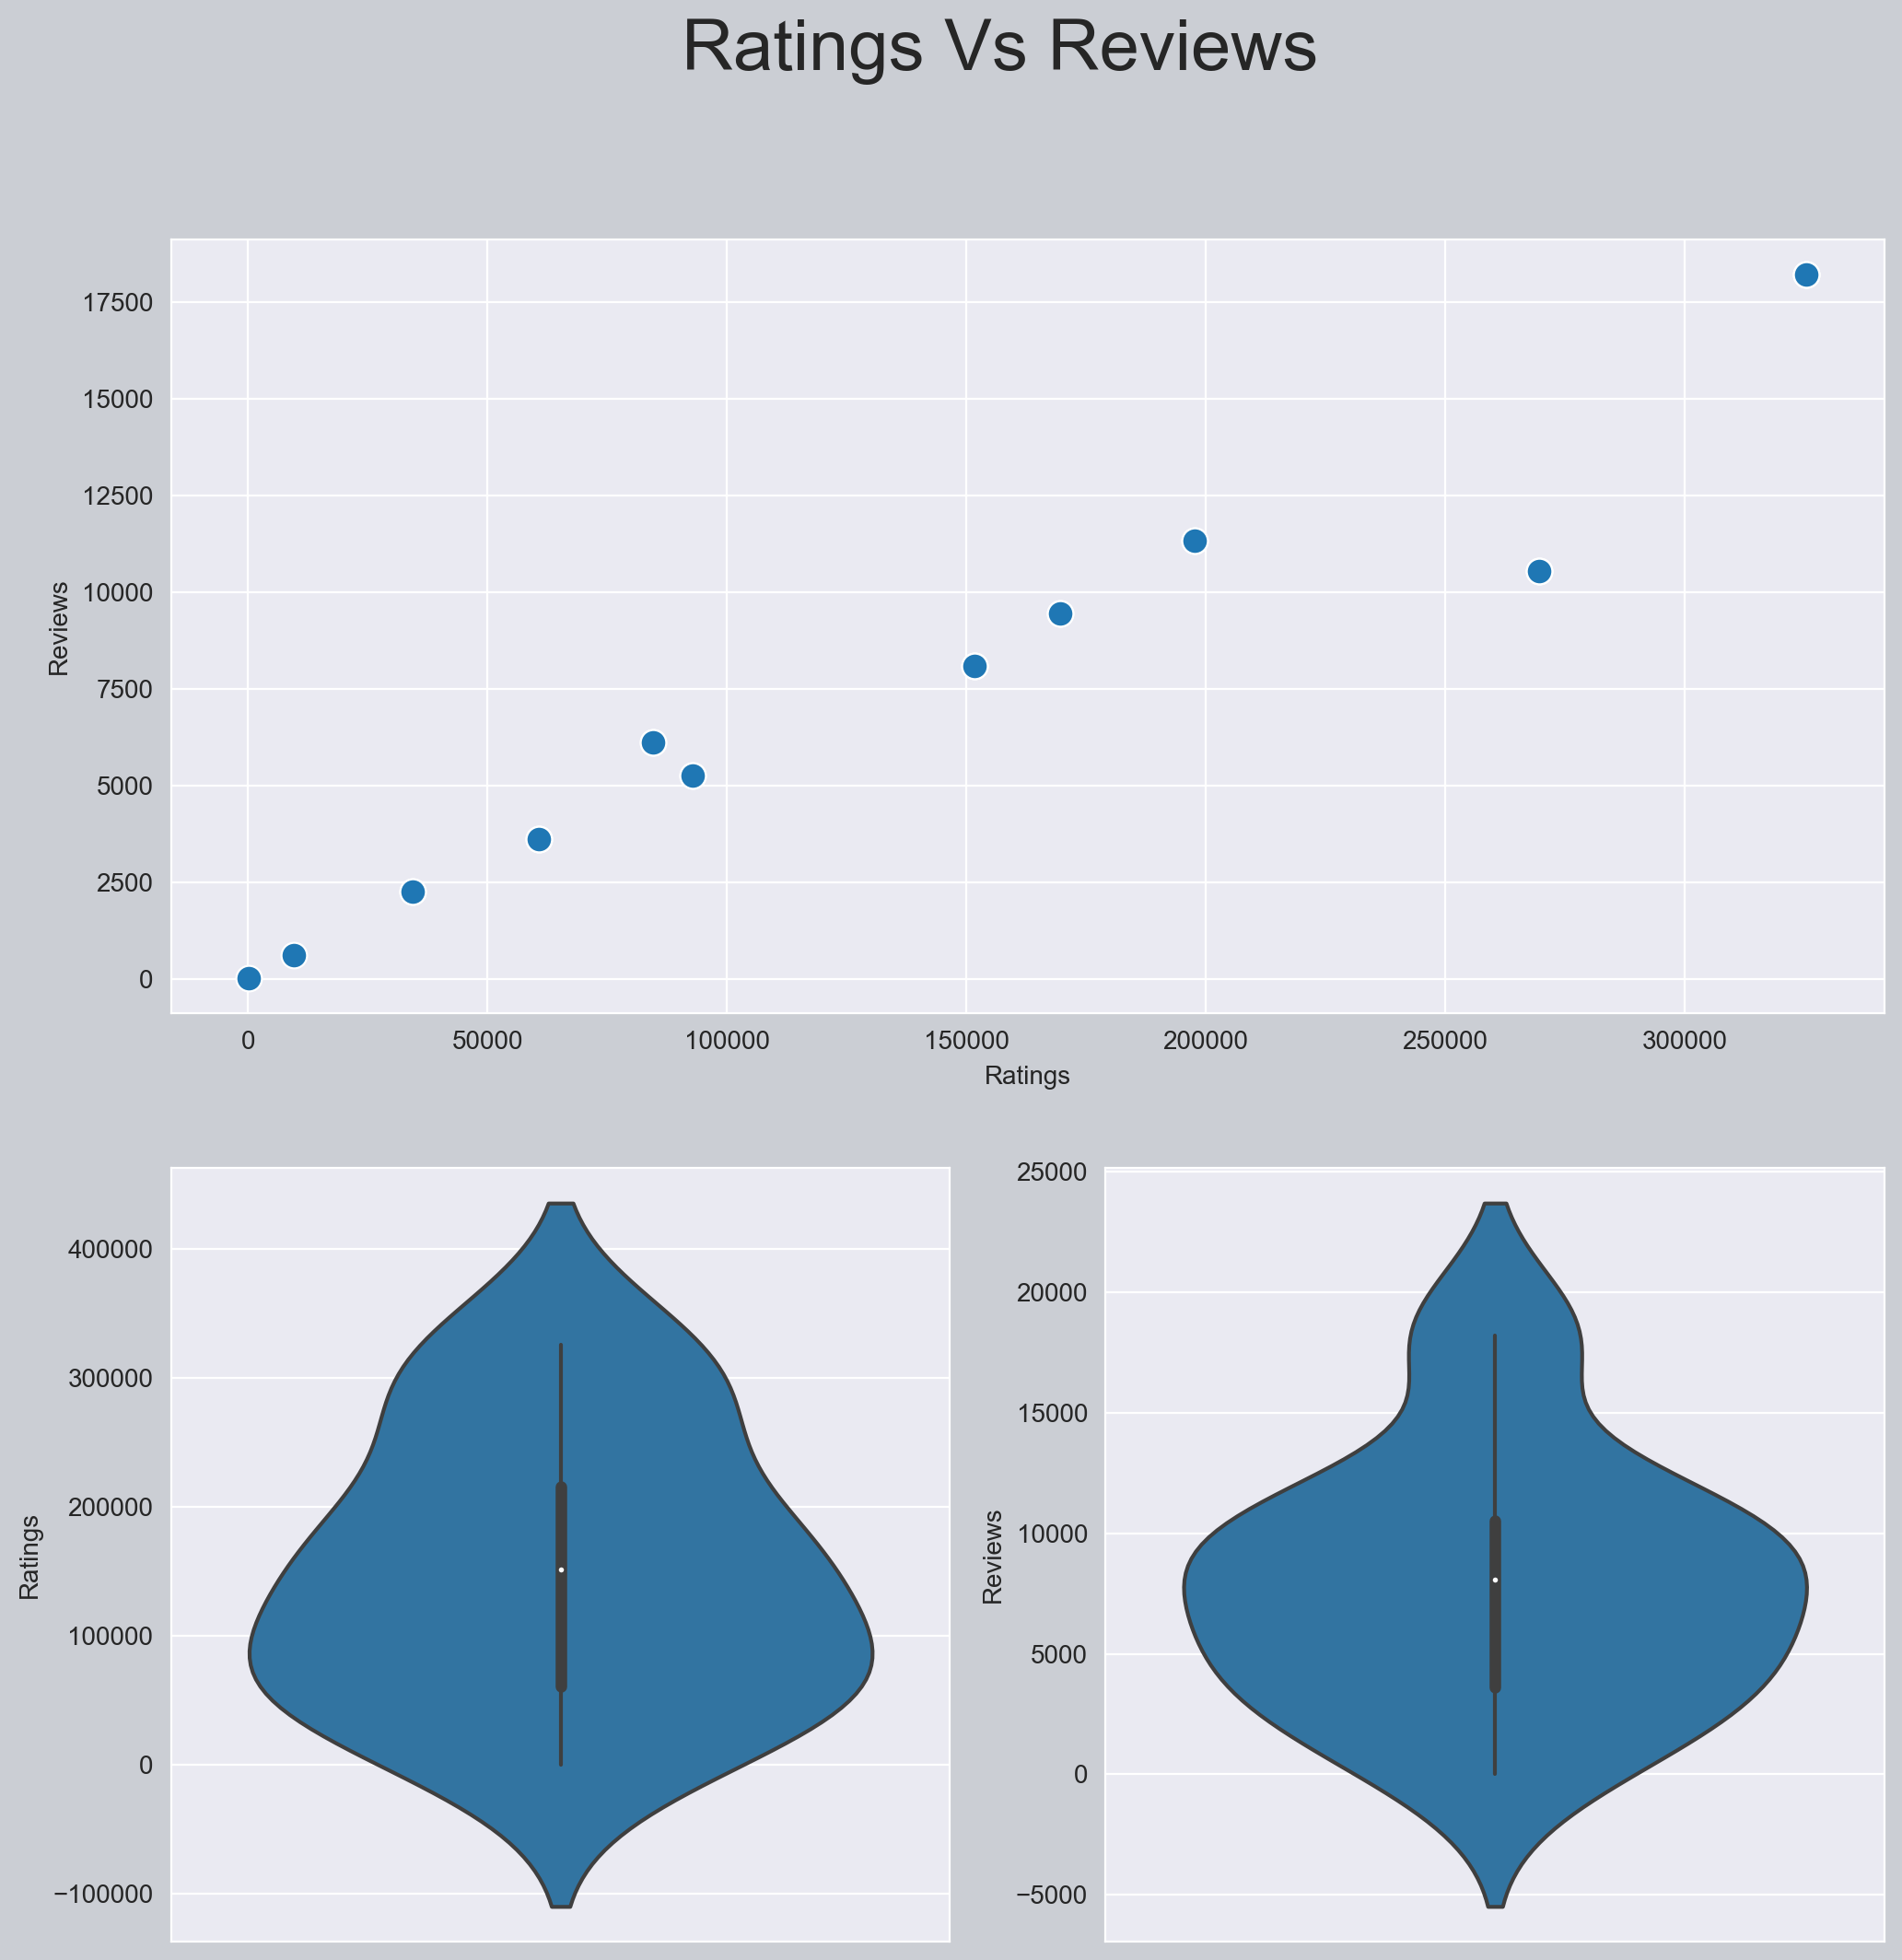

In [40]:
plt.figure(figsize = (12,12), dpi = 200, facecolor='#cbced4')
plt.suptitle('Ratings Vs Reviews', fontsize=28)
plt.subplot(2,1,1)
sns.scatterplot(x = 'Ratings',y='Reviews', data=mb_df, s=100)
plt.subplot(2,2,3)
sns.violinplot(y='Ratings', data=mb_df)
plt.subplot(2,2,4)
sns.violinplot(y='Reviews', data=mb_df)
plt.show()

**Observation on Ratings Vs Reviews :**
 - There is a relation between Ratings and Reviews
 - As Ratings of mobilephone increase, reviews also increase.
 - Highest phone can be seen on the range of reviews of 500 and ratings of 10000

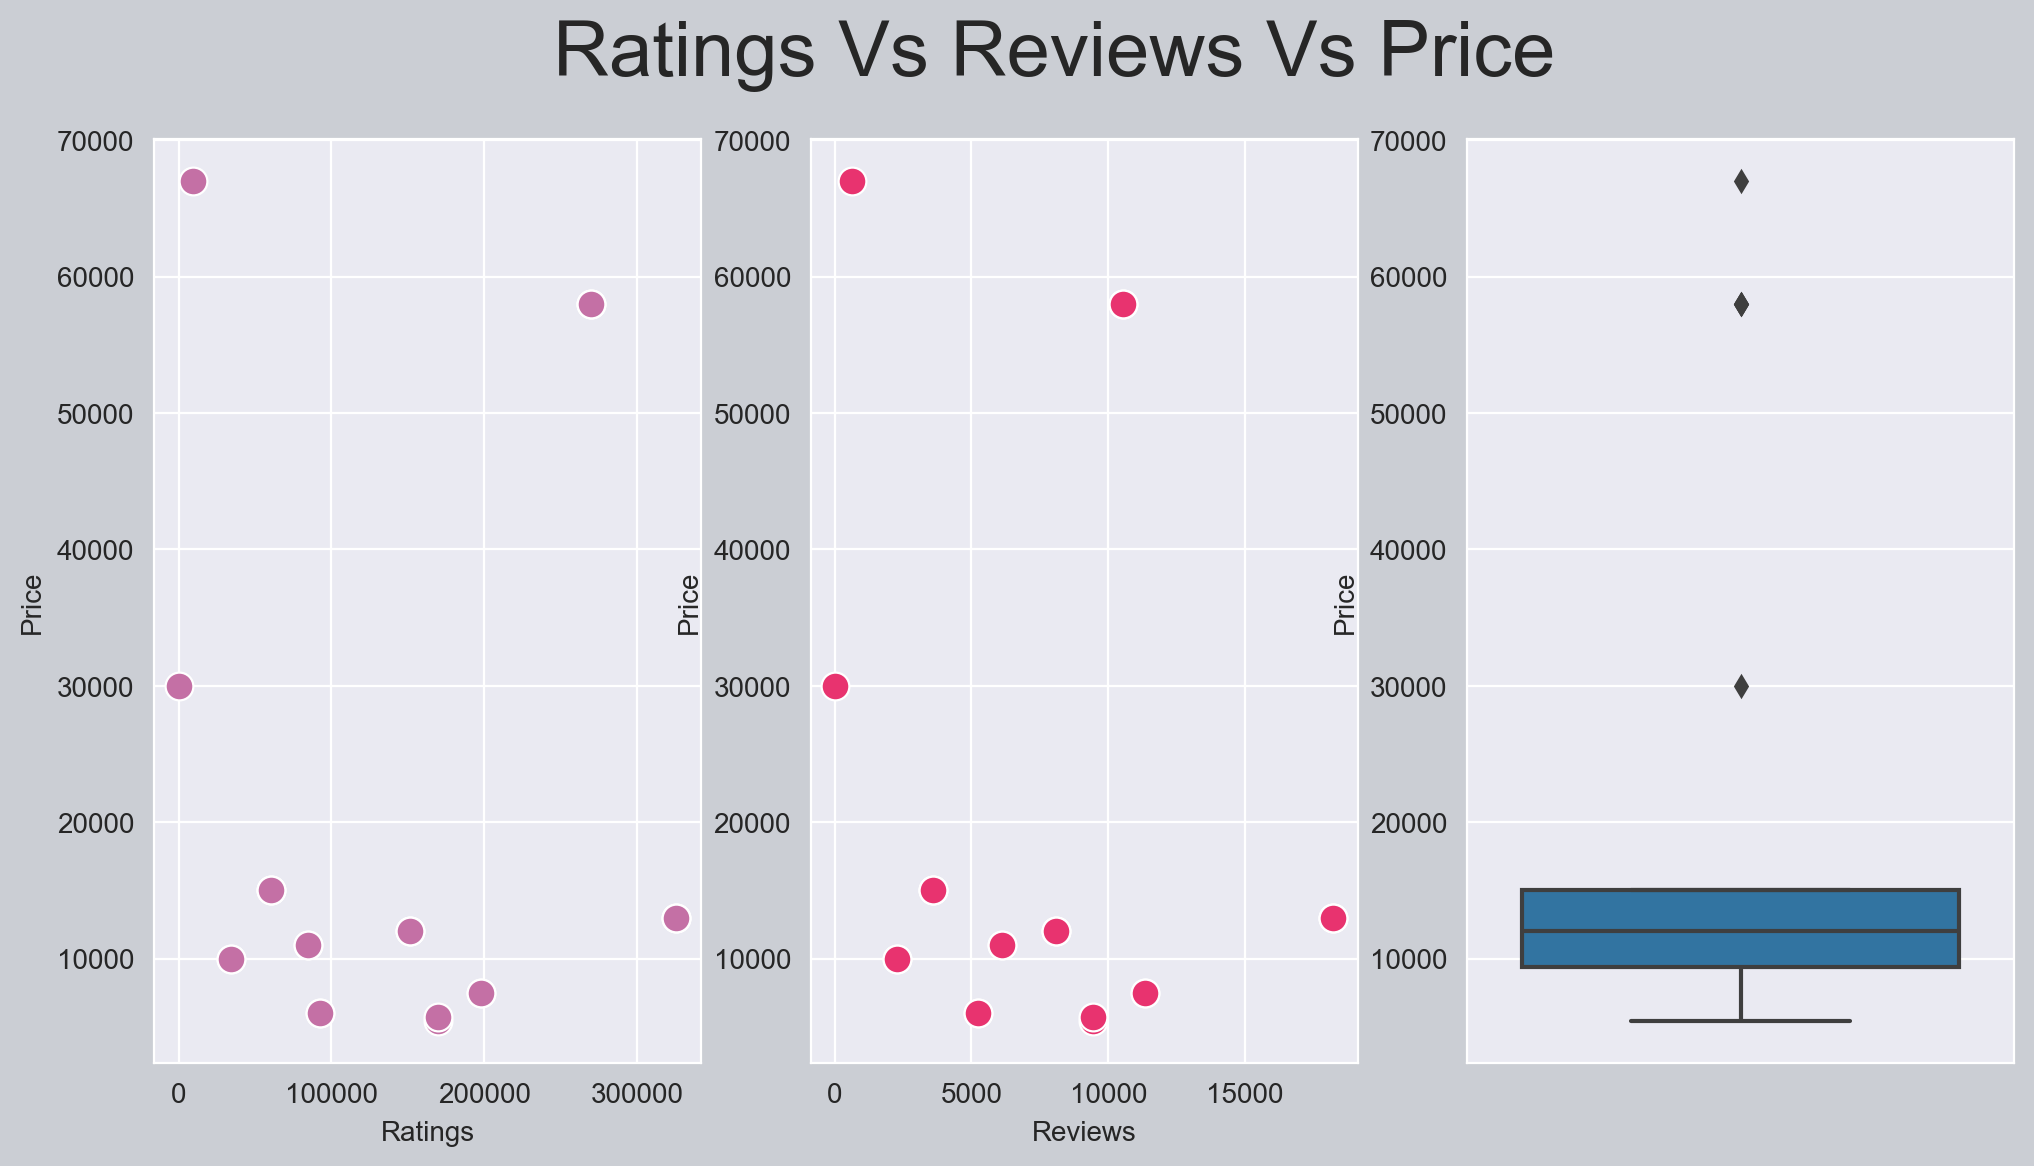

In [41]:
plt.figure(figsize = (12,6), dpi = 200, facecolor='#cbced4')
plt.suptitle('Ratings Vs Reviews Vs Price', fontsize=28)
plt.subplot(1,3,1)
sns.scatterplot(x = 'Ratings',y='Price', data=mb_df, s=100, color="#c470a5")
plt.subplot(1,3,2)
sns.scatterplot(x = 'Reviews',y='Price', data=mb_df, s=100, color="#e8336f")
plt.subplot(1,3,3)
sns.boxplot(y='Price', data=mb_df)
plt.show()

**Observation on Ratings Vs Price :**
 - Above graph show that Price and Ratings does not have any relatationship.
 - Also show that Price and Reviews does not have any relatationship
 - Highest phone segment can be seen in the price around 18000.

Text(0.5, 1.0, 'Model Vs Price')

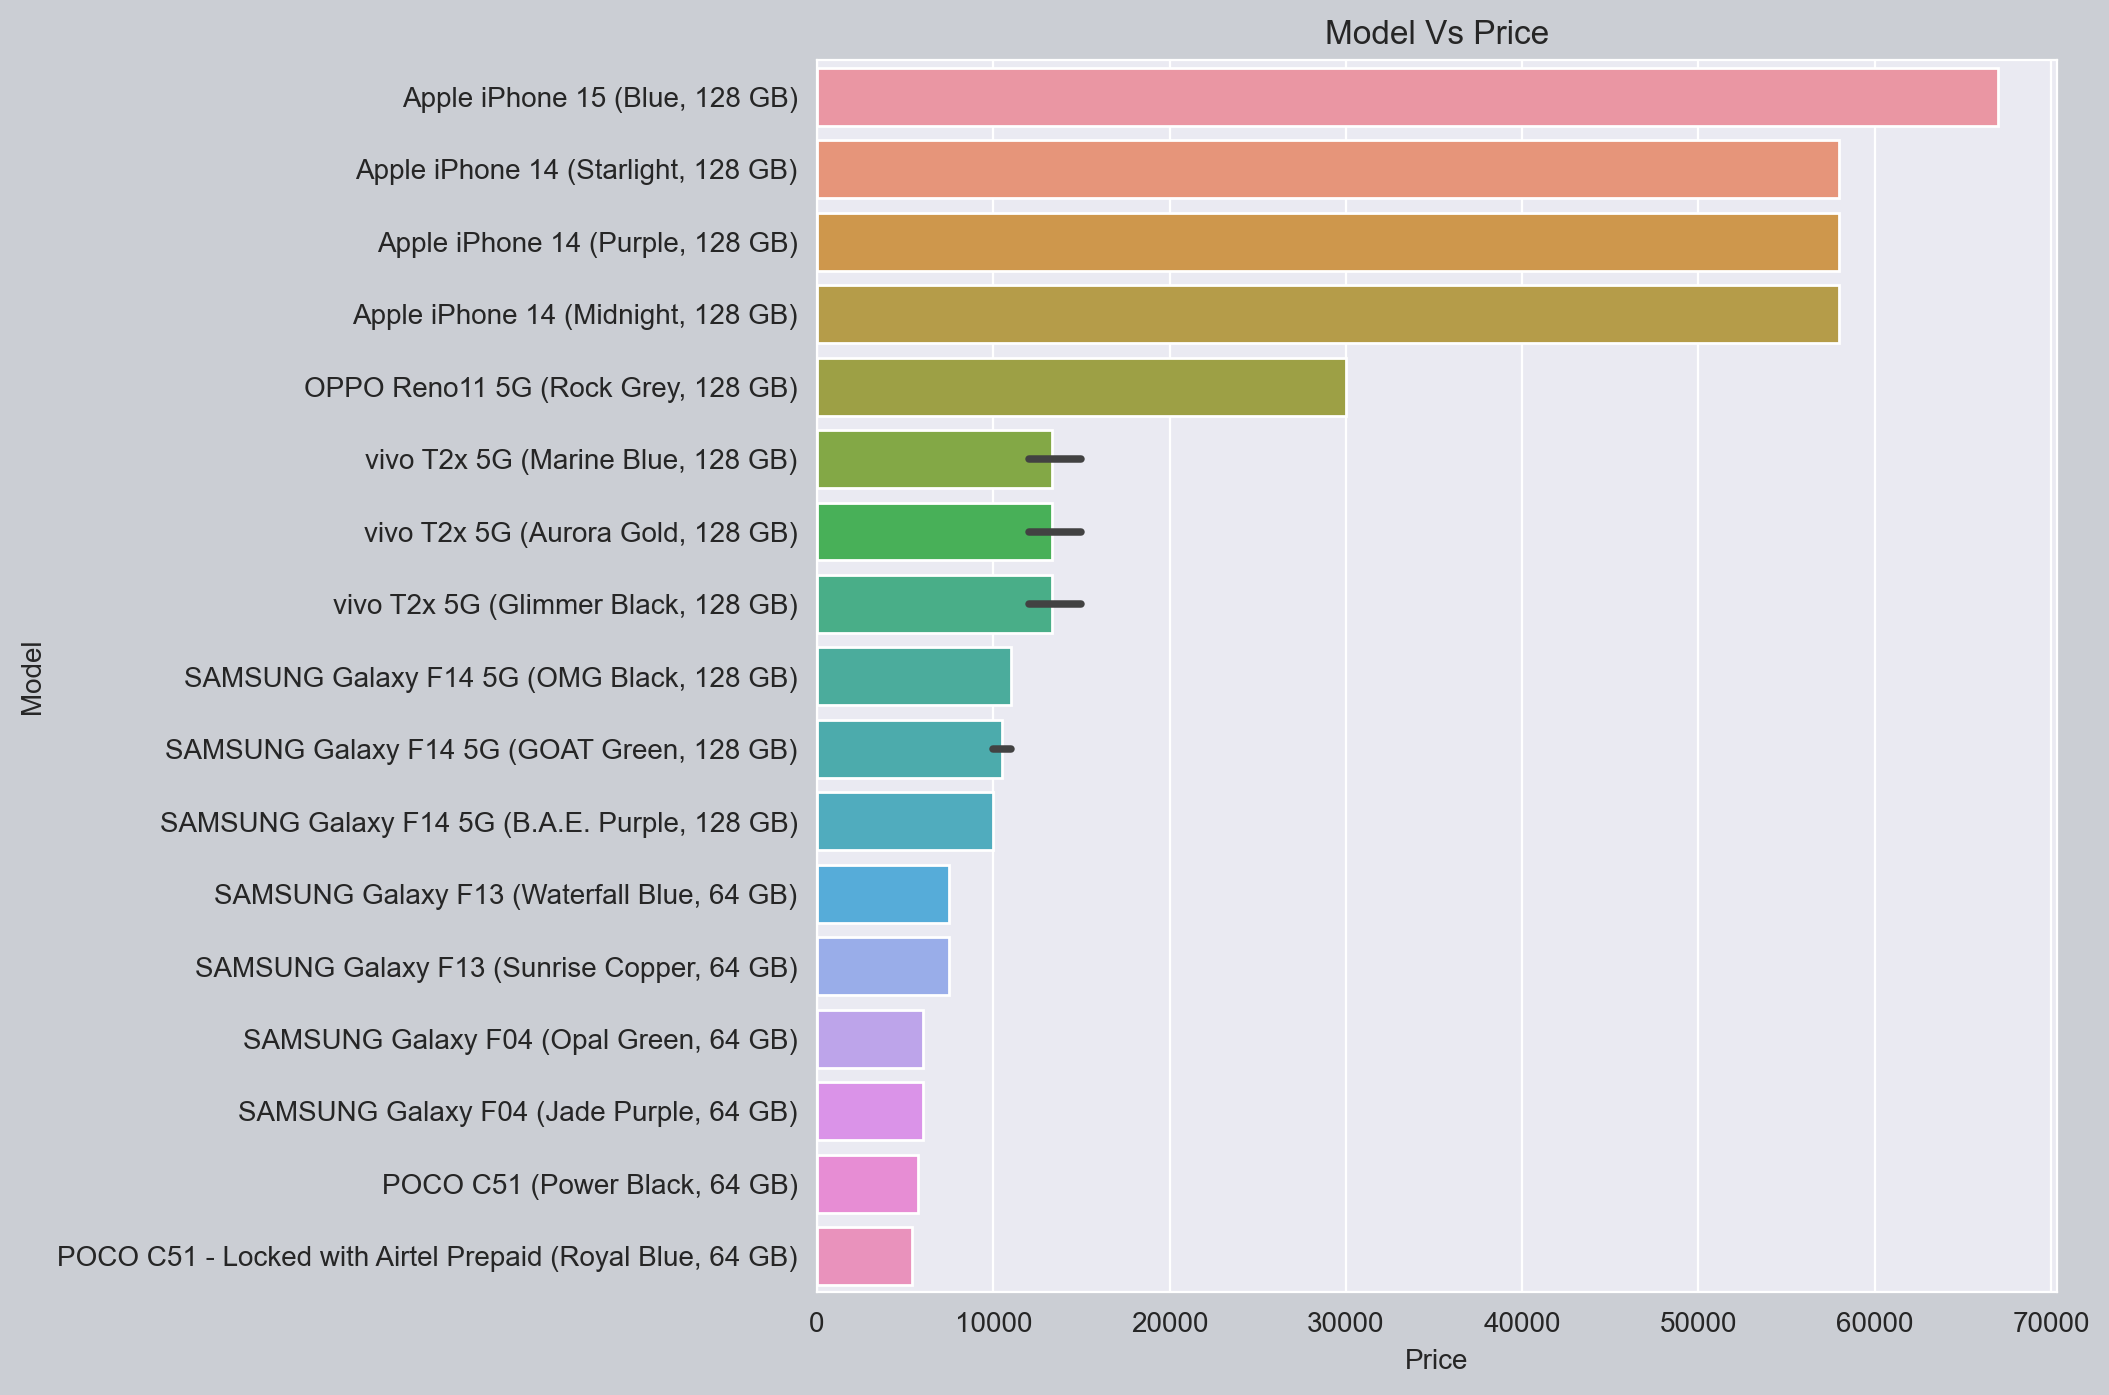

In [42]:
bar_df = mb_df.sort_values(by='Price',ascending=False)
plt.figure(figsize = (8,8), dpi = 200, facecolor='#cbced4')
sns.barplot(x='Price',y='Model', data = bar_df)
plt.title("Model Vs Price")